# Comparing skull sizes of Etruscans and modern Italian men

## Aim

Perform an hypothesis comparing the mean skull breadth of the ancient Etruscan
people of Italy with that of modern native Italians.

## Setup

In [1]:
# import packages and modules
from scipy.stats import probplot, t, ttest_ind
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sets Seaborn theme
sns.set_theme()

## Load

In [2]:
skulls = pd.read_csv("..\\data\\skulls.csv")

## Explore

### Preview

In [3]:
skulls.head()

,Etruscans,Italians
0,141,133.0
1,148,138.0
2,132,130.0
3,138,138.0
4,154,134.0


### Describe

In [4]:
skulls.describe().T

,count,mean,std,min,25%,50%,75%,max
Etruscans,84.0,143.773810,5.970512,126.0,140.0,143.5,148.00,158.0
Italians,70.0,132.442857,5.749948,116.0,129.0,132.0,136.75,148.0


### Plot

In [5]:
# unpivots the data (wide -> long)
mskulls = skulls.melt(
    value_vars=["Etruscans", "Italians"],
    var_name="skull",
    value_name="size")

mskulls.dropna(inplace=True)
mskulls["size"] = mskulls["size"].astype("int")  # receast the data

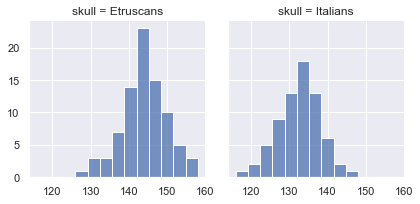

In [6]:
g = sns.FacetGrid(mskulls, col="skull")
g.map_dataframe(sns.histplot, x="size", bins=10)
plt.show()

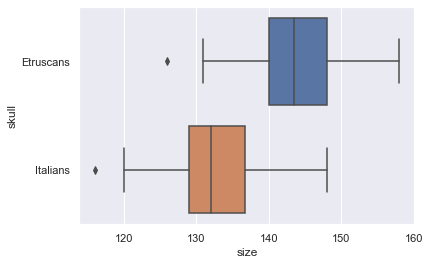

In [7]:
sns.boxplot(data=mskulls, x="size", y="skull")
plt.show()

## Analyse

### Probability plots

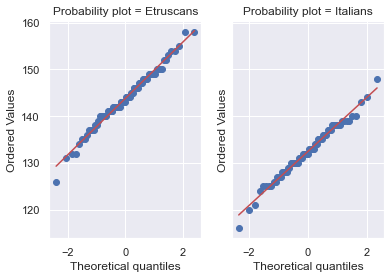

In [8]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

probplot(x=skulls["Etruscans"], plot=ax1)
ax1.set(title="Probability plot = Etruscans")

probplot(x=skulls["Italians"].dropna(), plot=ax2)
ax2.set(title="Probability plot = Italians")

plt.show()

### Test common variance

In [9]:
skulls["Etruscans"].var() > skulls["Italians"].var()

True

### Get 95% $t$-intervals

In [10]:
etr = skulls["Etruscans"]
t_etr = t(df=etr.size - 1, loc=etr.mean(), scale=etr.std() / sqrt(etr.size))
t_etr.interval(0.95)

(142.4781289349803, 145.06949011263873)

In [11]:
ita = skulls["Italians"]
t_ita = t(df=ita.size - 1, loc=ita.mean(), scale=ita.std() / sqrt(ita.size))
t_ita.interval(0.95)

(131.19504188049035, 133.69067240522395)

### Perform hypothesis test

In [12]:
ttest_ind(a=etr, b=ita, nan_policy="omit", alternative="two-sided")

Ttest_indResult(statistic=11.924823310633796, pvalue=1.4734025976096045e-23)